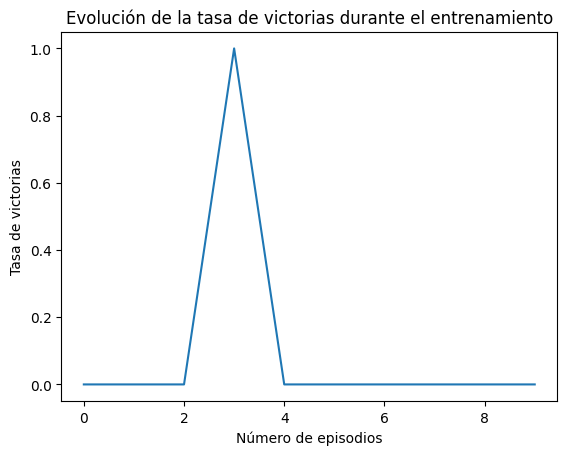

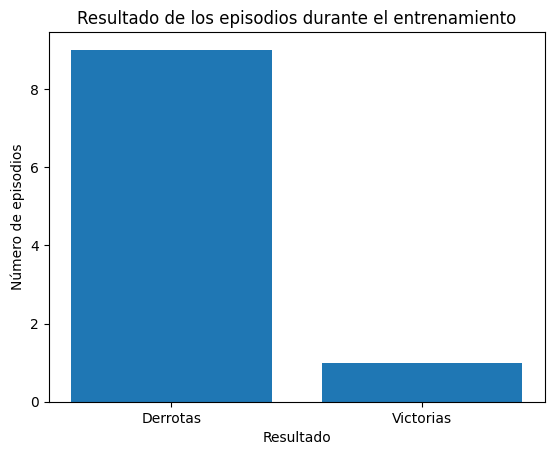

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from blackjack import Blackjack
from agent import QLearningAgent

# Entrenamiento del agente
env = Blackjack()
agent = QLearningAgent(n_actions=2)
num_episodes = 10
num_test_episodes = 10
win_rates = []
rewards_per_episode = []

for episode in range(num_episodes):
    state = env.reset()
    done = False
    total_wins = 0
    while not done:
        action = agent.choose_action(*state)
        next_state, reward, done = env.step(action)
        agent.update_q_table(state, action, reward, next_state)
        state = next_state
        if reward == 1:
            total_wins += 1
    win_rates.append(total_wins)

# Visualización de estadísticas
plt.plot(win_rates)
plt.xlabel('Número de episodios')
plt.ylabel('Tasa de victorias')
plt.title('Evolución de la tasa de victorias durante el entrenamiento')
plt.show()

# Contar el número de victorias y derrotas
num_wins = sum(win_rates)
num_losses = num_episodes - num_wins

# Crear una lista con el resultado de cada episodio (0 para derrota, 1 para victoria)
episode_results = [0] * num_losses + [1] * num_wins

# Visualización de estadísticas con diagrama de barras
plt.bar(['Derrotas', 'Victorias'], [num_losses, num_wins])
plt.xlabel('Resultado')
plt.ylabel('Número de episodios')
plt.title('Resultado de los episodios durante el entrenamiento')
plt.show()


